In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import display

from sklearn import preprocessing


In [46]:
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["ytick.color"] ="w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["text.color"] = "w"

sns.set_style("darkgrid")

In [47]:
#my own method to load non csv file :D
elnino1 = open("elnino", "r", encoding="utf-8")
elninof = elnino1.readlines()
elnino1.close()

elninof = [i[:-1] for i in elninof]
del elninof[-1]

elnino1 = list()
elnino1 = [sub.replace("     "," ") and sub.replace("    ", " ")
           and sub.replace("   ", " ")
           and sub.replace("  ", " ")
           for sub in elninof]

result = []
for i in range(len(elnino1)):
    result.append(elnino1[i].split(" "))

def remove_symbols(lst, val):
    for i in range(len(lst)):
        while val in lst[i]:
            lst[i].remove(val)
    return lst

result = remove_symbols(result, '')
elnino = result

#creating dataframe
elnino = pd.DataFrame(elnino, columns=["day", "buoy", "latitude", "longitude", "zon.winds", "mer.winds",
                                                 "huimidity", "air temp.", "s.s temp."])


pd.set_option("display.max_rows", None, "display.max_columns", None)
display(elnino)


,day,buoy,latitude,longitude,zon.winds,mer.winds,huimidity,air temp.,s.s temp.
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85
5,1,6,8.96,-140.33,-6.3,-4.9,91.5,26.82,27.98
6,1,7,8.97,-140.32,-6.7,-3.7,94.1,26.62,28.04
7,1,8,8.96,-140.33,-6.3,-4.8,92.0,26.89,27.98
8,1,9,8.97,-140.33,-6.3,-4.9,86.9,27.44,28.13
9,1,10,8.97,-140.32,-4.2,-2.5,87.3,26.62,28.14


In [48]:
elnino = elnino.replace(".", np.nan, inplace=False)
display(elnino)


,day,buoy,latitude,longitude,zon.winds,mer.winds,huimidity,air temp.,s.s temp.
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85
5,1,6,8.96,-140.33,-6.3,-4.9,91.5,26.82,27.98
6,1,7,8.97,-140.32,-6.7,-3.7,94.1,26.62,28.04
7,1,8,8.96,-140.33,-6.3,-4.8,92.0,26.89,27.98
8,1,9,8.97,-140.33,-6.3,-4.9,86.9,27.44,28.13
9,1,10,8.97,-140.32,-4.2,-2.5,87.3,26.62,28.14


In [49]:
for i in range(0,2):
    elnino[elnino.columns[i]]=pd.to_numeric(elnino[elnino.columns[i]], downcast='integer')
for j in range(2,9):
    elnino[elnino.columns[j]]=pd.to_numeric(elnino[elnino.columns[j]])

print(elnino.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day        782 non-null    int8   
 1   buoy       782 non-null    int8   
 2   latitude   782 non-null    float64
 3   longitude  782 non-null    float64
 4   zon.winds  677 non-null    float64
 5   mer.winds  677 non-null    float64
 6   huimidity  624 non-null    float64
 7   air temp.  684 non-null    float64
 8   s.s temp.  709 non-null    float64
dtypes: float64(7), int8(2)
memory usage: 44.4 KB
None


In [50]:
na_count = pd.DataFrame(elnino.isna().sum(), columns=["NaN count"])
display(na_count)


,NaN count
day,0
buoy,0
latitude,0
longitude,0
zon.winds,105
mer.winds,105
huimidity,158
air temp.,98
s.s temp.,73


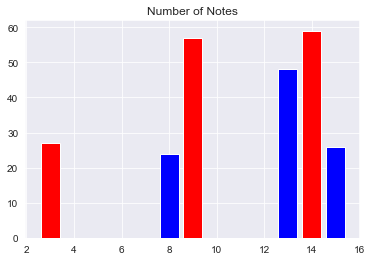

In [51]:
cnt_of_notes = elnino["day"].value_counts(sort=False)

height = [i for i in range(1, 60)]
plt.bar(cnt_of_notes, height, color=["red", "blue"])
plt.title("Number of Notes")
plt.show()

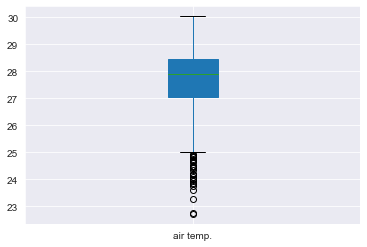

In [52]:
elnino.boxplot(column=["air temp."],patch_artist = True)

C:\Users\root\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\root\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


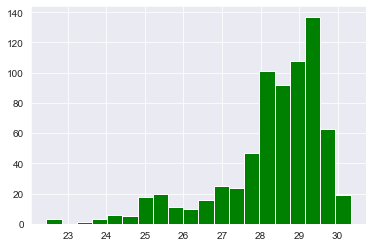

In [53]:
plt.hist(elnino["s.s temp."], bins=20, color="green")
plt.show()


In [54]:
elnino_2 = pd.DataFrame.copy(elnino)


elnino_2.iloc[:, 3:6] = elnino_2.iloc[:, 3:6].fillna(np.mean(elnino_2.iloc[:, 3:6]))

elnino_2.iloc[:, 5:8] = elnino_2.iloc[:, 5:8].fillna(elnino_2.iloc[:, 5:8].median())

In [55]:
del elnino_2["s.s temp."]
print(elnino_2.describe().transpose())

           count       mean         std     min     25%         50%      75%  \
day        782.0  30.315857   17.107440    1.00   15.00   31.000000  45.0000   
buoy       782.0   7.226343    3.925513    1.00    4.00    7.000000  11.0000   
latitude   782.0   0.282698    5.050045   -8.28   -4.98    0.000000   4.9700   
longitude  782.0 -66.361189  130.668776 -179.97 -154.99 -124.890000 -94.9500   
zon.winds  782.0  -3.901773    2.179722   -8.90   -5.20   -3.901773  -3.1000   
mer.winds  782.0  -0.601920    2.374924   -6.40   -2.20   -0.601920   0.7000   
huimidity  782.0  84.385780    4.562723   27.58   82.10   84.100000  86.7750   
air temp.  782.0  27.612417    1.165376   22.72   27.26   27.890000  28.3575   

              max  
day         59.00  
buoy        14.00  
latitude     8.97  
longitude  179.80  
zon.winds    7.00  
mer.winds    7.10  
huimidity   99.40  
air temp.   30.04  


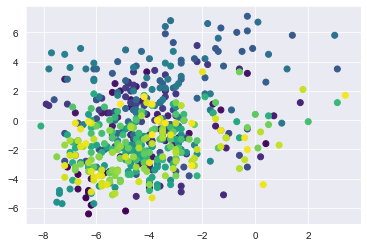

In [56]:
elnino_1 = pd.DataFrame.copy(elnino.dropna(inplace=False))


make_colors = [range(0, 533)]

plt.scatter(x=elnino_1["zon.winds"], y=elnino_1["mer.winds"], c=make_colors, cmap="viridis")

plt.show()

           latitude  longitude  zon.winds  mer.winds  huimidity  air temp.  \
latitude   1.000000   0.284257  -0.161338  -0.212177   0.179930   0.072854   
longitude  0.284257   1.000000   0.014271  -0.165742  -0.155278   0.341152   
zon.winds -0.161338   0.014271   1.000000   0.292069   0.037025  -0.132032   
mer.winds -0.212177  -0.165742   0.292069   1.000000  -0.126987  -0.335407   
huimidity  0.179930  -0.155278   0.037025  -0.126987   1.000000  -0.280910   
air temp.  0.072854   0.341152  -0.132032  -0.335407  -0.280910   1.000000   
s.s temp.  0.043396   0.346977   0.008062  -0.245158  -0.276526   0.926942   

           s.s temp.  
latitude    0.043396  
longitude   0.346977  
zon.winds   0.008062  
mer.winds  -0.245158  
huimidity  -0.276526  
air temp.   0.926942  
s.s temp.   1.000000  


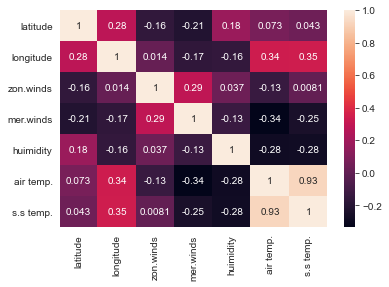

In [57]:
print(elnino_1.iloc[:, 2:].corr())

sns.heatmap(elnino_1.iloc[:, 2:].corr(),annot= True)
plt.show()

In [ ]:
sns.pairplot(elnino_1)
plt.show()


In [58]:
mer_1 = np.where(elnino_1["mer.winds"] > 0, "East", "West")
zon_1 = np.where(elnino_1["zon.winds"] > 0 , "Nort", "South")

elnino_1["zon.winds_1"] = zon_1
elnino_1["mer.winds_1"] = mer_1


In [59]:
elnino_1 = elnino_1.reindex(columns=["day", "buoy", "latitude", "longitude","huimidity",
                          "air temp.", "s.s temp.", "zon.winds_1",
                          "zon.winds", "mer.winds_1", "mer.winds"])

In [60]:
elnino_1["zon.winds_1"] = elnino_1["zon.winds_1"].astype('category')
elnino_1["mer.winds_1"] = elnino_1["mer.winds_1"].astype('category')

print(elnino_1.info(verbose=True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 767
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   day          533 non-null    int8    
 1   buoy         533 non-null    int8    
 2   latitude     533 non-null    float64 
 3   longitude    533 non-null    float64 
 4   huimidity    533 non-null    float64 
 5   air temp.    533 non-null    float64 
 6   s.s temp.    533 non-null    float64 
 7   zon.winds_1  533 non-null    category
 8   zon.winds    533 non-null    float64 
 9   mer.winds_1  533 non-null    category
 10  mer.winds    533 non-null    float64 
dtypes: category(2), float64(7), int8(2)
memory usage: 35.6 KB
None


In [61]:
elnino_1["huimidity"] = preprocessing.scale(elnino_1["huimidity"])

max_abs_scaler = preprocessing.MaxAbsScaler()
reshape_arr = np.array(elnino_1["air temp."])
reshape_arr = reshape_arr.reshape(-1, 1)

elnino_1["air temp."] = max_abs_scaler.fit_transform(reshape_arr)

# display(elnino_1)

In [62]:
elnino_1["s.s temp_1"] = pd.qcut(elnino_1["s.s temp."], q=4)
print(elnino_1["s.s temp_1"])

elnino_1["s.s temp_2"] = pd.cut(elnino_1["s.s temp."], bins=[20, 24, 28, 32])
print(elnino_1["s.s temp_2"])


elnino_1["s.s temp_3"] = pd.cut(elnino_1["s.s temp."], bins=5)
print(elnino_1["s.s temp_3"])


0      (22.439, 27.63]
1      (22.439, 27.63]
2       (27.63, 28.71]
3       (27.63, 28.71]
4       (27.63, 28.71]
5       (27.63, 28.71]
6       (27.63, 28.71]
7       (27.63, 28.71]
8       (27.63, 28.71]
9       (27.63, 28.71]
10      (27.63, 28.71]
11      (27.63, 28.71]
12      (27.63, 28.71]
13      (27.63, 28.71]
14      (27.63, 28.71]
15      (27.63, 28.71]
16      (27.63, 28.71]
17      (27.63, 28.71]
18      (27.63, 28.71]
19      (27.63, 28.71]
20      (28.71, 29.33]
21      (27.63, 28.71]
22      (28.71, 29.33]
23      (28.71, 29.33]
24      (27.63, 28.71]
25      (27.63, 28.71]
26      (27.63, 28.71]
27      (27.63, 28.71]
28      (27.63, 28.71]
29      (27.63, 28.71]
30      (27.63, 28.71]
31      (27.63, 28.71]
32     (22.439, 27.63]
33     (22.439, 27.63]
34     (22.439, 27.63]
35     (22.439, 27.63]
36     (22.439, 27.63]
37     (22.439, 27.63]
38     (22.439, 27.63]
39     (22.439, 27.63]
40     (22.439, 27.63]
41     (22.439, 27.63]
42     (22.439, 27.63]
43     (22.

In [63]:
sample_data = elnino_1.sample(n=100)
display(sample_data)


,day,buoy,latitude,longitude,huimidity,air temp.,s.s temp.,zon.winds_1,zon.winds,mer.winds_1,mer.winds,s.s temp_1,s.s temp_2,s.s temp_3
644,49,12,8.09,156.02,0.037679,0.951065,28.95,South,-7.5,West,-2.5,"(28.71, 29.33]","(28, 32]","(28.76, 30.34]"
276,22,1,0.11,-94.99,0.798056,0.854527,27.63,South,-4.9,East,4.8,"(22.439, 27.63]","(24, 28]","(27.18, 28.76]"
174,14,3,4.98,-109.96,-0.700334,0.922104,28.75,Nort,1.4,East,5.8,"(28.71, 29.33]","(28, 32]","(27.18, 28.76]"
667,51,7,2.09,156.22,-1.013430,0.952064,28.98,South,-3.4,West,-3.8,"(28.71, 29.33]","(28, 32]","(28.76, 30.34]"
365,29,11,-1.98,-179.85,-0.588514,0.960719,29.69,South,-2.8,West,-2.0,"(29.33, 30.34]","(28, 32]","(28.76, 30.34]"
79,6,13,-5.01,-139.92,-1.930355,0.943409,28.88,South,-7.8,East,1.0,"(28.71, 29.33]","(28, 32]","(28.76, 30.34]"
457,36,5,-2.15,-170.02,1.155880,0.955060,29.60,South,-3.2,West,-1.1,"(29.33, 30.34]","(28, 32]","(28.76, 30.34]"
578,45,1,-8.28,-154.97,-0.655606,0.928429,29.26,Nort,2.0,West,-0.1,"(28.71, 29.33]","(28, 32]","(28.76, 30.34]"
717,55,1,5.03,165.02,-0.163597,0.948735,28.68,South,-6.2,West,-3.5,"(27.63, 28.71]","(28, 32]","(27.18, 28.76]"
759,58,6,-5.00,165.21,-0.141233,0.915113,29.56,Nort,3.4,East,1.7,"(29.33, 30.34]","(28, 32]","(28.76, 30.34]"
